<a href="https://colab.research.google.com/github/Keerthija9/DataMining/blob/main/Assignment_Session_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Trees Assignment

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Loading the Data

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

#Calculating Proportions

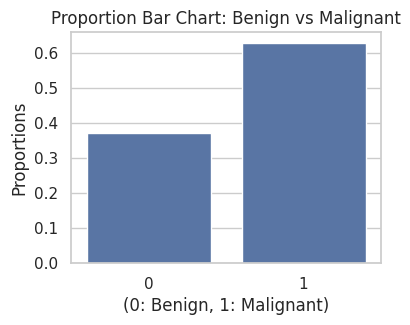

In [3]:
proportions = pd.Series(y).value_counts(normalize=True)

sns.set(style="whitegrid")
plt.figure(figsize=(4, 3))
sns.barplot(x=proportions.index, y=proportions.values)
plt.title("Proportion Bar Chart: Benign vs Malignant")
plt.xlabel("(0: Benign, 1: Malignant)")
plt.ylabel("Proportions")
plt.show()

We plotted the proportions of the target values (Benign and Malignant) and found that there are more malignant cases than benign ones.

#Partitioning the dataset 80/20 (train / test)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

#Creating a decision tree classifier

We initially created a decision tree classifier using the full dataset. After fitting it with the training data, we displayed the tree's text representation with feature importance. Finally, we visualized the tree structure in a plot to better understand its decision-making process.

In [5]:
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
text_representation = tree.export_text(fullClassTree, show_weights=True)
print(text_representation)

|--- feature_7 <= 0.05
|   |--- feature_23 <= 957.45
|   |   |--- feature_13 <= 42.19
|   |   |   |--- feature_24 <= 0.18
|   |   |   |   |--- feature_19 <= 0.00
|   |   |   |   |   |--- feature_27 <= 0.09
|   |   |   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |   |   |   |--- feature_27 >  0.09
|   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |--- feature_19 >  0.00
|   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |--- weights: [0.00, 174.00] class: 1
|   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |--- feature_1 <= 23.84
|   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |--- feature_1 >  23.84
|   |   |   |   |   |   |   |--- weights: [0.00, 12.00] class: 1
|   |   |   |--- feature_24 >  0.18
|   |   |   |   |--- feature_29 <= 0.11
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- feature_29 >  0.11
|   |   |   |   |   |--- weights: [1.00, 

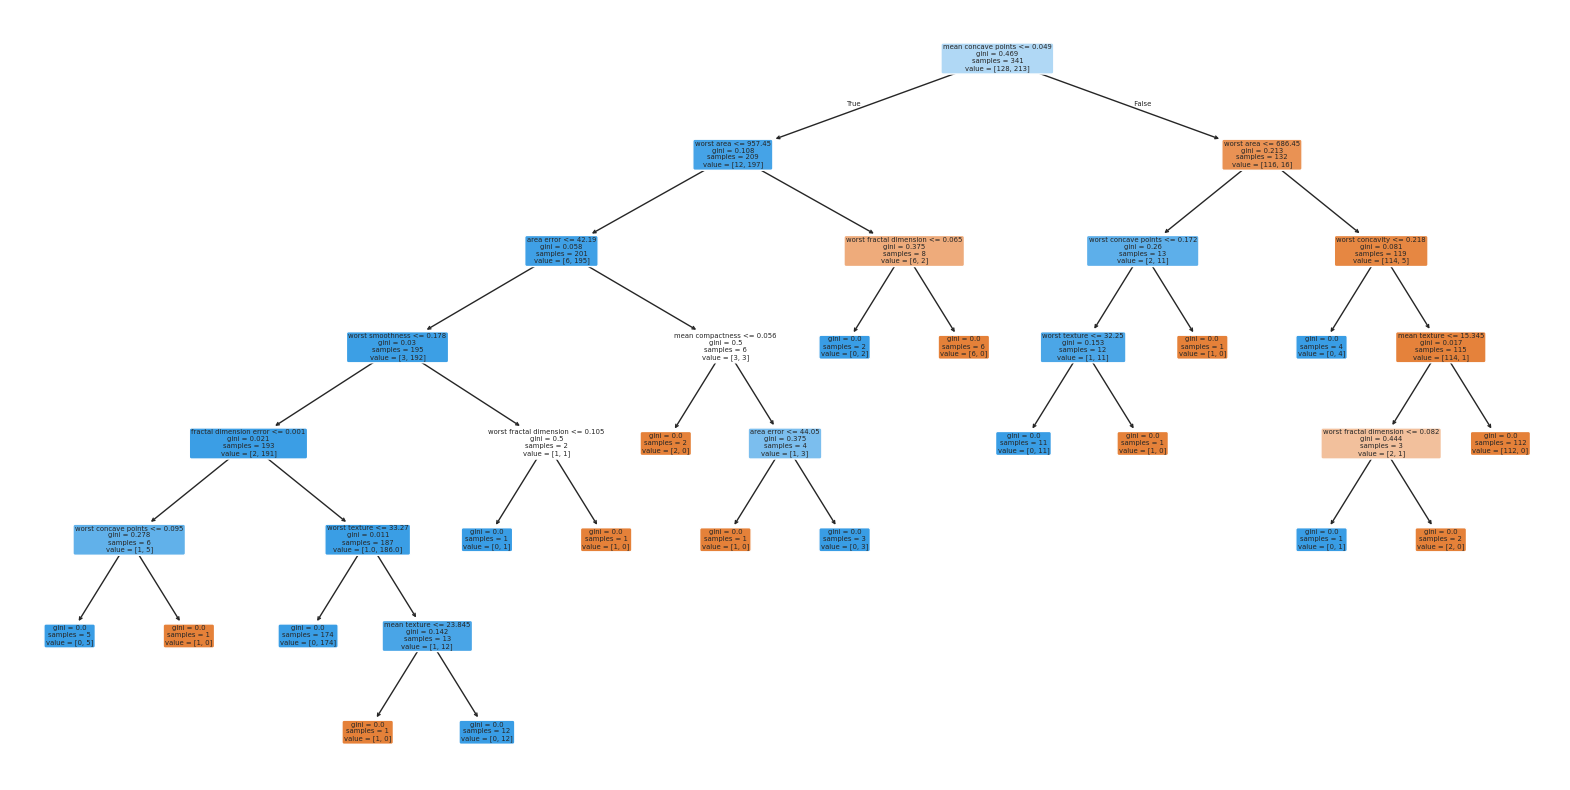

In [7]:
# Visualize Decision Tree
fig = plt.figure(figsize=(20,10))

_ = tree.plot_tree(fullClassTree,
                   feature_names=dataset.feature_names,
                   #class_names=fullClassTree.classes_,
                   rounded=True,
                   filled=True)

After observing the plot of the decision tree for the full dataset, we can see an overfitting problem, meaning the model has become too complex and is capturing noise in the data

In [8]:
# predict probabilities
probs_train = fullClassTree.predict_proba(X_train)[:,1]
probs_test = fullClassTree.predict_proba(X_test)[:,1]

# predict class membership
y_train_pred = fullClassTree.predict(X_train)
y_test_pred = fullClassTree.predict(X_test)

In [9]:
fullClassTree.predict_proba(X_train)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix,roc_curve, auc
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        84
           1       0.96      0.95      0.96       144

    accuracy                           0.95       228
   macro avg       0.94      0.95      0.94       228
weighted avg       0.95      0.95      0.95       228



In [11]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       213

    accuracy                           1.00       341
   macro avg       1.00      1.00      1.00       341
weighted avg       1.00      1.00      1.00       341



#Reducing the overfitting

To reduce overfitting, we created a decision tree with a limited depth and specific split criteria, then visualized the tree.

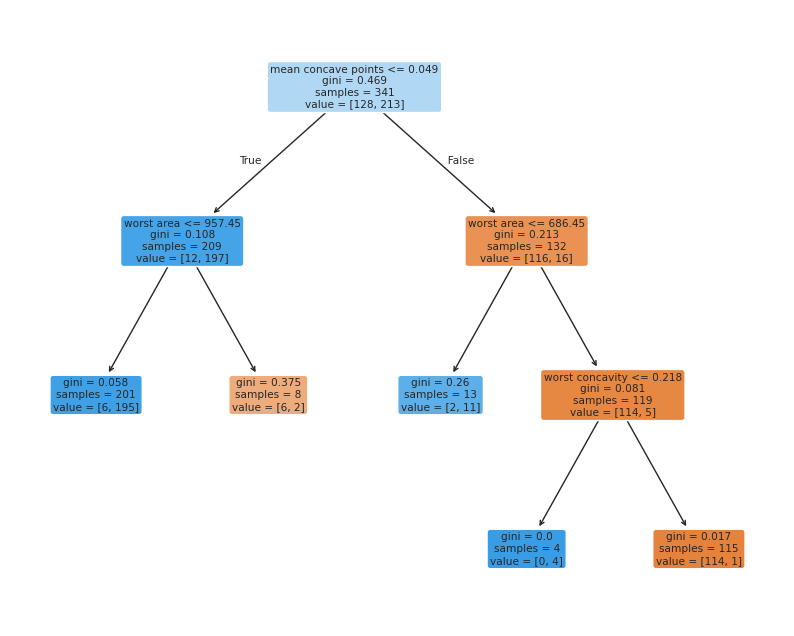

In [12]:
smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smallClassTree.fit(X_train, y_train)

# Visualize Decision Tree
fig = plt.figure(figsize=(10,8))

_ = tree.plot_tree(smallClassTree,
                   feature_names=dataset.feature_names,
                   rounded=True,
                   filled=True)

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix,roc_curve, auc

In [14]:
# predict probabilities
probs_train = smallClassTree.predict_proba(X_train)[:,1]
probs_test = smallClassTree.predict_proba(X_test)[:,1]

# predict class membership
y_train_pred = smallClassTree.predict(X_train)
y_test_pred = smallClassTree.predict(X_test)

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        84
           1       0.96      0.95      0.96       144

    accuracy                           0.95       228
   macro avg       0.94      0.95      0.94       228
weighted avg       0.95      0.95      0.95       228



#Finding the optimal tree with grid search

To find the optimal decision tree, we conducted a grid search using the given hyperparameters as follows.

In [15]:
param_grid = {
    'max_depth':[8],
    'min_samples_split': [50,100],
    'min_impurity_decrease': [0.001, 0.005, 0.01],
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='f1',cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

score:  0.9498082698579953
parameters:  {'max_depth': 8, 'min_impurity_decrease': 0.01, 'min_samples_split': 50}


In [16]:
bestClassTree=gridSearch.best_estimator_

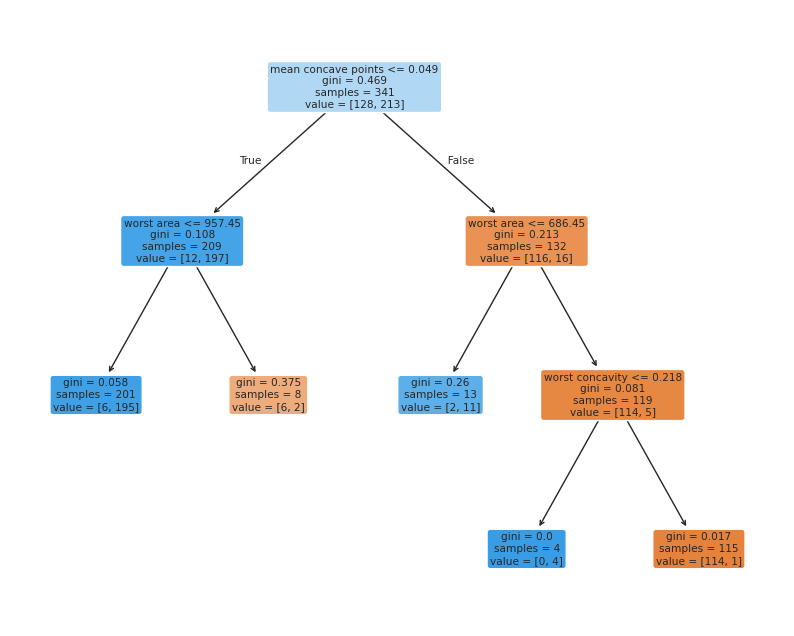

In [17]:
# Visualize Decision Tree
fig = plt.figure(figsize=(10,8))

_ = tree.plot_tree(bestClassTree,
                   feature_names=dataset.feature_names,
                   rounded=True,
                   filled=True)

#Computing predictions on test dataset

In [18]:
# predict probabilities
probs_train = bestClassTree.predict_proba(X_train)[:,1]
probs_test = bestClassTree.predict_proba(X_test)[:,1]

# predict class membership
y_train_pred = bestClassTree.predict(X_train)
y_test_pred = bestClassTree.predict(X_test)

In [19]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        84
           1       0.96      0.95      0.96       144

    accuracy                           0.95       228
   macro avg       0.94      0.95      0.94       228
weighted avg       0.95      0.95      0.95       228



In [20]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       128
           1       0.96      0.99      0.97       213

    accuracy                           0.97       341
   macro avg       0.97      0.96      0.97       341
weighted avg       0.97      0.97      0.97       341



#Evaluating the predictions



Accuracy.........: 94.7368
Precision........: 96.4789
Recall...........: 95.1389
FP Rate..........: 4.8611
ROC AUC (probs)..: 0.9526
F1 measure.......: 0.9580
Confusion matrix.:
 [[ 79   5]
 [  7 137]]


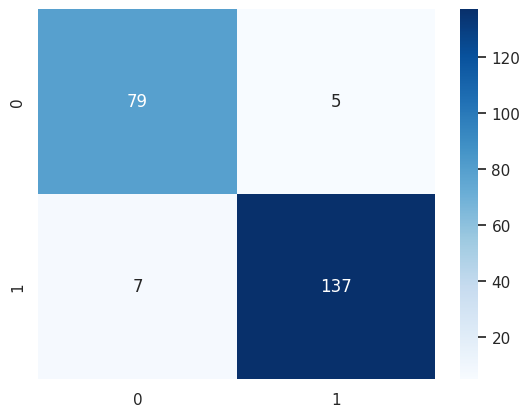

In [21]:

accuracy = accuracy_score(y_test, y_test_pred)
precision=precision_score(y_test, y_test_pred, pos_label=1)
recall=recall_score(y_test, y_test_pred, pos_label=1)
f1 = f1_score(y_test, y_test_pred, pos_label=1)
specificity=recall_score(y_test, y_test_pred, pos_label=1)
roc = roc_auc_score(y_test, probs_test )

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision *100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate..........: {(1-specificity) * 100:.4f}")
print(f"ROC AUC (probs)..: {roc :.4f}")
print(f"F1 measure.......: {f1 :.4f}")

cm = confusion_matrix(y_test, y_test_pred)
print(f"Confusion matrix.:\n {cm}")

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues");

From the output , we infer that the decision tree performs well with high accuracy and precision. It correctly predicts 95.14% of actual malignant cases and has a low false positive rate (4.86%).  The F1 score of 0.9580 confirms a good balance between precision and recall. The confusion matrix indicates only a few misclassifications: 5 benign cases wrongly predicted as malignant and 7 malignant cases missed.